In [31]:
import pandas as pd
import numpy as np

# Читаем данные

In [32]:
data = pd.read_csv('fertility_Diagnosis.txt', sep=",", header=None)
data.columns = ["Season", "Age", "Diseases", "Trauma","Surg","Fevers","Alcohol","Smoking","NHSP","Diagnosis"]

In [33]:
data

,Season,Age,Diseases,Trauma,Surg,Fevers,Alcohol,Smoking,NHSP,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,1
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,-1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,1
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,-1
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,1
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,1
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,1
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,1
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,1


In [34]:
#Функция для нахождения евклидовой метрики
def dist(a,b):
    c = 0
    for i in range(9):
        c += (a[i]-b[i])**2
    return np.sqrt(c)

In [35]:
a = tuple(data.iloc[0])
b = tuple(data.iloc[1])
dist(a,b)

1.8404890654388577

In [36]:
# Матрица расстояний до объектов
metrics = np.zeros([100,100])
for i in range(100):
    for j in range(100):
        metrics[i][j]=dist(tuple(data.iloc[i]),tuple(data.iloc[j]))

In [150]:
h_max = np.matrix(metrics).max()
h_min = np.matrix(metrics).min()
print(h_max)
print(h_min)
metrics

3.7542509239527395
0.0


array([[0.        , 1.84048907, 2.05438555, ..., 1.67755775, 1.72264332,
        1.40178458],
       [1.84048907, 0.        , 2.29558271, ..., 2.35834688, 1.26225988,
        2.5623817 ],
       [2.05438555, 2.29558271, 0.        , ..., 1.5855283 , 1.60143685,
        1.93419234],
       ...,
       [1.67755775, 2.35834688, 1.5855283 , ..., 0.        , 1.41961262,
        1.08388191],
       [1.72264332, 1.26225988, 1.60143685, ..., 1.41961262, 0.        ,
        1.77834192],
       [1.40178458, 2.5623817 , 1.93419234, ..., 1.08388191, 1.77834192,
        0.        ]])

In [38]:
data["Diagnosis"][0]

1

In [39]:
len(metrics[0])

100

### Вводим ядерные функции

In [40]:
def K_1(r):
    assert (abs(r)<=1),"Bad argument!"
    return 3/4*(1-r**2)

def K_2(r):
    assert (abs(r)<=1),"Bad argument!"
    return 15/16*((1-r**2)**2)

def K_3(r):
    assert (abs(r)<=1),"Bad argument!"
    return 1-abs(r)

def K_4(r):
    return ((2*np.pi)**(-0.5))*(np.exp(-0.5*r**2))

def K_5(r):
    assert (abs(r)<=1),"Bad argument!"
    return 0.5*abs(r)

In [148]:
data["Diagnosis"].value_counts()

 1    88
-1    12
Name: Diagnosis, dtype: int64

In [164]:
def count_errors(h):
    errors = 0
    for i in range(100):
        lov_num = 0
        for j in range(100):
            if i != j:
                lov_num += K_4(metrics[i][j]/h) * data["Diagnosis"][j]
                #print(data["Diagnosis"][j])
                #print(K_4(metrics[i][j]/h) * data["Diagnosis"][j])
            else:
                continue
        print("LOV_NUM:",lov_num)
        if np.sign(data["Diagnosis"][i]) != np.sign(lov_num):
            errors += 1
    return errors

In [183]:
a = count_errors(0.7)
print(a)

LOV_NUM: 0.9432373214515254
LOV_NUM: 1.604161399938441
LOV_NUM: 3.4415070713739975
LOV_NUM: 1.824565205511723
LOV_NUM: 3.248670865116914
LOV_NUM: 2.213246373306555
LOV_NUM: 0.5379574588888246
LOV_NUM: 3.2076777218011556
LOV_NUM: 1.3349393783988601
LOV_NUM: 2.314502211820044
LOV_NUM: 0.541944289433989
LOV_NUM: 1.3753343855072455
LOV_NUM: 1.1230815992903231
LOV_NUM: 2.2923338521219083
LOV_NUM: 0.900409628537087
LOV_NUM: 0.8014440888906819
LOV_NUM: 1.504945249396201
LOV_NUM: 2.1302429559469096
LOV_NUM: 1.0874138327701517
LOV_NUM: 1.2533258927913493
LOV_NUM: 1.3312773586713664
LOV_NUM: 1.2851008091933696
LOV_NUM: 1.4531836377583158
LOV_NUM: 0.812809936464692
LOV_NUM: 1.4726313640976807
LOV_NUM: 2.3163204554763643
LOV_NUM: 1.9745500164140266
LOV_NUM: 0.9649281282718817
LOV_NUM: 1.3466107623461814
LOV_NUM: 0.8987163727597131
LOV_NUM: 1.4753494055677732
LOV_NUM: 2.3409950231752927
LOV_NUM: 1.249652833472033
LOV_NUM: 1.4828411787039075
LOV_NUM: 1.3969796907981793
LOV_NUM: 2.469613478267827
LOV

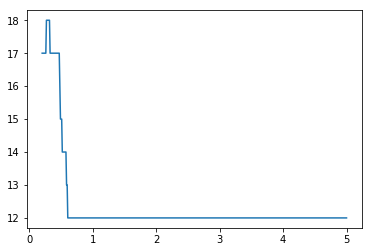

In [161]:
import matplotlib.pyplot as plt
x = list(np.linspace(0.2,5,500))
y = []
for _ in x:
    y.append(count_errors(_))
    
plt.plot(x,y)